In [1]:
#load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import pickle
import numpy as np

from functions import get_closest_TADs

In [2]:
#create lst of chr IDs
chromosomes = ['chr'+str(i) for i in range(1,23)] + ['chrX','chrY']
#load data (pickle)
with open('../output/bart3d_DCIs.pickle', "rb") as f:
    bart3d_DCIs = pickle.load(f)

### Find conserved DCIs based on threshold = 7

In [3]:
#assign dataframes to variables
pair_names = list(bart3d_DCIs.keys())
pair1_df = bart3d_DCIs[pair_names[0]].copy()
pair2_df = bart3d_DCIs[pair_names[1]].copy()
pair3_df = bart3d_DCIs[pair_names[2]].copy()

In [4]:
#save each individual pair with DCI >= 7
# pair1_df[pair1_df.DCI_Score>=7].to_csv('../output/circa/pair1_DCIs_over_7.txt', index=False, sep='\t')
# pair2_df[pair2_df.DCI_Score>=7].to_csv('../output/circa/pair2_DCIs_over_7.txt', index=False, sep='\t')
# pair3_df[pair3_df.DCI_Score>=7].to_csv('../output/circa/pair3_DCIs_over_7.txt', index=False, sep='\t')

In [5]:
#find conserved DCIs across the three pairs
pair1_pair2 = get_closest_TADs(pair1_df, pair2_df, chromosomes, threshold=7)
conserved_DCIs = get_closest_TADs(pair3_df, pair1_pair2, chromosomes, threshold=7)

#subset for distances <= 40kb
conserved_DCIs_40kb = conserved_DCIs[conserved_DCIs.Distance<=40000].copy()
print('conserved_DCIs_40kb: {}'.format(conserved_DCIs_40kb.shape[0]))

#save
#conserved_DCIs_40kb.to_csv('../output/conserved_DCIs_thr7.txt', 
#                            header=True, index=None, sep='\t')

conserved_DCIs_40kb: 347


### Load and format HML2 sequences

In [6]:
##load HML2 sequences
hml2_df = pd.read_excel('../data/hml2/C4_PGCLC_withFeature_KO_wishlist.xlsx',
                        engine='openpyxl')
hml2_df.head()

,ID,chr,feature,detail,length,specificity,day0 EB,norm count,assoc gene,KO RANK,reason
0,6272_22:23538315-23548383,22,LTR5B,NaN,10069,excellent,+,120000,in PCAT14,1,LTR5B: Very Strong (>50000)
1,K-14_22:18938672-18947848,22,LTR5,LTR5_Hs,9177,excellent,+,55000,NaN,1,LTR5: Very Strong (>50000)
2,K-11_5:156657704-156666885,5,LTR5,LTR5_Hs,9182,excellent,-,52000,in SGCD,1,LTR5: Very Strong (>50000)
3,K-9_6:77716943-77726366,6,LTR5,LTR5_Hs,9424,excellent,-,50000,in MEI4,1,LTR5: Very Strong (>50000)
4,K-7_8:7497873-7507337,8,LTR5,LTR5_Hs,9465,excellent,-,22000,in DEFB107A/B,2,LTR5: Strong (5k-50k)


In [7]:
##infer start and end coordinates from ID column
ID_list = hml2_df.ID.tolist()
start_list = [ID.split(':')[1].split('-')[0] for ID in ID_list]
end_list = [ID.split(':')[1].split('-')[1] for ID in ID_list]

#format df
hml2_df['chr'] = 'chr'+hml2_df['chr'].astype(str)
hml2_df['start'] = start_list
hml2_df['start'] = hml2_df['start'].astype(int)
hml2_df['end'] = end_list
hml2_df['end'] = hml2_df['end'].astype(int)

#Rename columns
hml2_df.rename(columns={'chr':'Chr', 'start':'Start', 'end':'End',
                        'norm count':'norm_count', 'KO RANK':'KO_RANK',
                        'feature':'Feature'}, 
                        inplace=True)

#keep coordinates of only highly expressed sequences
hml2_df_short = hml2_df[['Chr','Feature','Start','End','KO_RANK','norm_count','ID']]
hml2_df_short = hml2_df_short[hml2_df_short['KO_RANK']<=4]
display(hml2_df_short)

#save
#hml2_df_short.to_csv('../data/hml2/hml2_df_short.txt', 
#                     header=True, index=None, sep='\t')

,Chr,Feature,Start,End,KO_RANK,norm_count,ID
0,chr22,LTR5B,23538315,23548383,1,120000,6272_22:23538315-23548383
1,chr22,LTR5,18938672,18947848,1,55000,K-14_22:18938672-18947848
2,chr5,LTR5,156657704,156666885,1,52000,K-11_5:156657704-156666885
3,chr6,LTR5,77716943,77726366,1,50000,K-9_6:77716943-77726366
4,chr8,LTR5,7497873,7507337,2,22000,K-7_8:7497873-7507337
5,chr11,LTR5,118721013,118730174,2,22000,K-20_11:118721013-118730174
6,chr3,LTR5,101692113,101701253,2,16000,1045_3:101692113-101701253
7,chr11,LTR5,101695061,101704528,2,15000,K-8_11:101695061-101704528
8,chr12,LTR5,58327457,58336915,2,13000,K-13_12:58327457-58336915
9,chr3,LTR5,113024275,113033435,2,12000,K-12_3:113024275-113033435


### Find conserved DCIs close to HML2 sequences

In [8]:
DCIs_and_HML2 = get_closest_TADs(conserved_DCIs_40kb[['Chr','Start','End']], 
                                 hml2_df_short, chromosomes, threshold=None,
                                 columns=['Chr', 'Start', 'End'])
print('DCIs_and_HML2: {}'.format(DCIs_and_HML2.shape[0]))
#DCIs_and_HML2.to_csv('../output/DCIs_and_HML2_thr7.txt', 
#                     header=True, index=None, sep='\t')

Not enough TADs found for chromosome chr2
Not enough TADs found for chromosome chr9
Not enough TADs found for chromosome chr13
Not enough TADs found for chromosome chr14
Not enough TADs found for chromosome chr15
Not enough TADs found for chromosome chr16
Not enough TADs found for chromosome chr17
Not enough TADs found for chromosome chr18
Not enough TADs found for chromosome chr20
Not enough TADs found for chromosome chr21
Not enough TADs found for chromosome chrX
Not enough TADs found for chromosome chrY
DCIs_and_HML2: 19


In [9]:
DCIs_and_HML2.head()

,Chr,Start,End,Coordinate,ClosestTAD,Feature,KO_RANK,norm_count,ID,Distance
0,chr1,66417246,66425819,"(66417246, 0)","(52040000, 0)",LTR5,4.0,100.0,5913_1:66417246-66425819,14377246.0
1,chr1,155626664,155635845,"(155626664, 0)","(154560000, 0)",LTR5,2.0,10000.0,K-10_1:155626664-155635845,1066664.0
2,chr3,9841749,9854710,"(9841749, 0)","(6480000, 0)",LTR5,2.0,8000.0,864_3:9841749-9854710,3361749.0
3,chr3,101692113,101701253,"(101692113, 0)","(106080000, 0)",LTR5,2.0,16000.0,1045_3:101692113-101701253,4387887.0
4,chr3,185562546,185571727,"(185562546, 0)","(196520000, 0)",LTR5,2.0,5000.0,K-15_3:185562546-185571727,10957454.0


In [10]:
#calculate spearman correlation between distance and norm_count
DCIs_and_HML2_log = DCIs_and_HML2.copy()
DCIs_and_HML2_log['norm_count'] = np.log(DCIs_and_HML2['norm_count'])

corr, p_val = sp.stats.spearmanr(a=DCIs_and_HML2_log['Distance'], 
                                 b=DCIs_and_HML2_log['norm_count'])
print('Spearman correlation: {:.4f}'.format(corr))
print('P-value: {:.4f}'.format(p_val))

Spearman correlation: -0.5953
P-value: 0.0072


<Figure size 720x432 with 0 Axes>

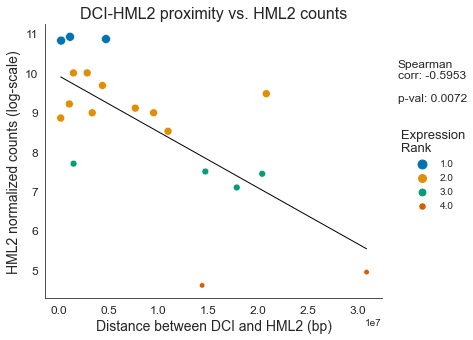

In [11]:
#calculate spearman correlation between distance and norm_count
plt.figure(figsize=(10,6))
sns.set_style("white")
ax = sns.relplot(data=DCIs_and_HML2_log, x='Distance', y='norm_count',
                 hue='KO_RANK', palette='colorblind', size='KO_RANK', 
                 sizes=(80, 30), height=4.5, aspect=1.2, legend='full')
sns.regplot(data=DCIs_and_HML2_log, x='Distance', y='norm_count', 
            scatter_kws={'s':0}, ci=None, line_kws={"color":"black", "linewidth":1})
ax._legend.set_title("Expression\nRank", prop={'size': 13})

#add texts
plt.text(0.9, 0.80, 'Spearman\ncorr: {:.4f}'.format(corr),
         ha='left', transform=plt.gcf().transFigure,
         fontsize=12)
plt.text(0.9, 0.73, 'p-val: {:.4f}'.format(p_val),
         ha='left', transform=plt.gcf().transFigure,
         fontsize=12)

plt.title('DCI-HML2 proximity vs. HML2 counts', fontsize=16)
plt.xlabel('Distance between DCI and HML2 (bp)', fontsize=14)
plt.ylabel('HML2 normalized counts (log-scale)', fontsize=14)

#tick font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.savefig('../output/figures/DCI_distance_HML2_count.png', 
#            bbox_inches='tight', dpi=300)
plt.show()